# GBIF data for L. Coffea species in Madagascar with GPS coordinates

https://www.gbif.org/


## Fetch Madagascar coffea species data from GBIF db using the `utils.gbif_api` helper module from `py_madaclim`

Example of a base query with curl

- taxon = L. coffea
- country = Madagascar
- has_coordinate = True
- has_geospatial_issue = False


`curl https://api.gbif.org/v1/occurence/search?country=MG&has_coordinate=true&has_geospatial_issue=false&taxon_key=2895315&`

### Fetch data with 'occurrence/search' + 'occurence/download' API endpoints


In [1]:
from pathlib import Path
import re
import os
import requests

from dotenv import load_dotenv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

from py_madaclim.utils import gbif_api


#### Get taxon key for L. Coffea in the GBIF db using the gbif_api helper module inside py_madaclim

In [2]:
# Get GBIF API response for L. Coffea search
gbif_api.get_taxon_key_by_species_match(name="coffea", return_full_on_match=True)

EXACT match type found with 95% confidence!
canonical name of match: Coffea
GBIF_taxon_key: 2895315


{'usageKey': 2895315,
 'scientificName': 'Coffea L.',
 'canonicalName': 'Coffea',
 'rank': 'GENUS',
 'status': 'ACCEPTED',
 'confidence': 95,
 'matchType': 'EXACT',
 'kingdom': 'Plantae',
 'phylum': 'Tracheophyta',
 'order': 'Gentianales',
 'family': 'Rubiaceae',
 'genus': 'Coffea',
 'kingdomKey': 6,
 'phylumKey': 7707728,
 'classKey': 220,
 'orderKey': 412,
 'familyKey': 8798,
 'genusKey': 2895315,
 'synonym': False,
 'class': 'Magnoliopsida'}

In [3]:
# extract taxon_key
coffea_key = gbif_api.get_taxon_key_by_species_match("coffea")

EXACT match type found with 95% confidence!
canonical name of match: Coffea
GBIF_taxon_key: 2895315


#### Search for occurrences records in the GBIF using taxon key

See function docstrings for base parameters in the `requests.get`:
- GADM id == Madagascar
- has GPS coordinates
- no geospatial issues in occurrence

In [4]:
coffea_search_results = gbif_api.search_occ_mdg_valid_coordinates(taxon_key=coffea_key)

Fetching all 2793 occurences accross all possible years...
Extracting occurences 0 to 300...
Extracting occurences 300 to 600...
Extracting occurences 600 to 900...
Extracting occurences 900 to 1200...
Extracting occurences 1200 to 1500...
Extracting occurences 1500 to 1800...
Extracting occurences 1800 to 2100...
Extracting occurences 2100 to 2400...
Extracting occurences 2400 to 2700...
Extracting occurences 2700 to 2793...
Total records retrieved: 2793


When no `year_range` are specified, all occurrences are returned. You can filter results upstream of the query using if needed

In [5]:
coffea_search_results_2010_present = gbif_api.search_occ_mdg_valid_coordinates(
    taxon_key=coffea_key,
    year_range=(2010, 2023)
)

Fetching all 613 occurences in year range 2010-2023...
Extracting occurences 0 to 300...
Extracting occurences 300 to 600...
Extracting occurences 600 to 613...
Total records retrieved: 613


**Read the results into a pandas df**

In [6]:
coff_search_df = pd.DataFrame(coffea_search_results)
coff_search_df.head()

,key,datasetKey,publishingOrgKey,installationKey,hostingOrganizationKey,publishingCountry,protocol,lastCrawled,lastParsed,crawlId,...,georeferenceProtocol,dynamicProperties,lifeStage,organismRemarks,endDayOfYear,accessRights,http://unknown.org/recordEnteredBy,datasetID,taxonRemarks,associatedReferences
0,4137704080,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2023-07-27T09:09:54.958+00:00,2023-07-27T14:33:41.783+00:00,385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4138335098,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2023-07-27T09:09:54.958+00:00,2023-07-27T14:14:39.327+00:00,385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4137997535,50c9509d-22c7-4a22-a47d-8c48425ef4a7,28eb1a3f-1c15-4a95-931a-4af90ecb574d,997448a8-f762-11e1-a439-00145eb45e9a,28eb1a3f-1c15-4a95-931a-4af90ecb574d,US,DWC_ARCHIVE,2023-07-27T09:09:54.958+00:00,2023-07-27T14:33:44.443+00:00,385,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4126236438,e053ff53-c156-4e2e-b9b5-4462e9625424,90fd6680-349f-11d8-aa2d-b8a03c50a862,c4e134d3-c68f-406d-a116-6a37895602e0,90fd6680-349f-11d8-aa2d-b8a03c50a862,US,EML,2023-07-25T18:18:42.562+00:00,2023-07-25T20:14:08.775+00:00,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4126230420,e053ff53-c156-4e2e-b9b5-4462e9625424,90fd6680-349f-11d8-aa2d-b8a03c50a862,c4e134d3-c68f-406d-a116-6a37895602e0,90fd6680-349f-11d8-aa2d-b8a03c50a862,US,EML,2023-07-25T18:18:42.562+00:00,2023-07-25T20:14:09.459+00:00,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
coff_search_df.shape

(2793, 141)

In [8]:
coff_search_df.dtypes.value_counts()

object     119
float64     11
int64       10
bool         1
dtype: int64

#### Explore search_occurrences with missing 'species' entry

We have some lower-ranked taxonomy such as subspecies and variety

In [9]:
coff_search_df["taxonRank"].unique()

array(['SPECIES', 'GENUS', 'SUBSPECIES', 'VARIETY'], dtype=object)

Missing vals in species have some 'GENUS' in taxon rank, meaning they are only identified as L. Coffea

In [10]:
coff_search_df[coff_search_df["taxonRank"] == "GENUS"]["species"].unique()

array([nan], dtype=object)

670 entries with missing values in 'species' key and explore to which taxon rank they belong

In [11]:
coff_search_df["species"].isnull().sum()

667

In [12]:
coff_search_df[coff_search_df["species"].isnull()]["taxonRank"].value_counts()

GENUS    667
Name: taxonRank, dtype: int64

In [13]:
coff_search_df[["species", "taxonRank"]]

,species,taxonRank
0,Coffea pervilleana,SPECIES
1,Coffea perrieri,SPECIES
2,Coffea pervilleana,SPECIES
3,NaN,GENUS
4,NaN,GENUS
...,...,...
2788,Coffea richardii,SPECIES
2789,Coffea richardii,SPECIES
2790,Coffea richardii,SPECIES
2791,Coffea richardii,SPECIES


Ahh so all of the missing values have only a higher taxonomic rank defined (no species)

In [14]:
coff_search_df["species"].value_counts()

Coffea mangoroensis      143
Coffea resinosa          118
Coffea richardii          97
Coffea perrieri           91
Coffea grevei             82
                        ... 
Coffea canephora           4
Coffea vavateninensis      4
Coffea eugenioides         2
Coffea magnistipula        1
Coffea liberica            1
Name: species, Length: 65, dtype: int64

In [15]:
# Assert if we can find an example species name in the null entries from a species not present in the other cols
if not pd.concat([coff_search_df[col].str.contains("kalobinonensis", case=False, na=False) if coff_search_df[col].dtype == 'object' else None for col in coff_search_df.columns], axis=1).sum().sum() > 0:
    print("No 'kalobinonensis' found in whole species-NaN object-type cols")

No 'kalobinonensis' found in whole species-NaN object-type cols


**Double check by using the gbifID if we could recover more info**

In [16]:
missing_vals_gbifids = coff_search_df[coff_search_df["species"].isnull()]["key"].values
missing_vals_gbifids[:5]

array([4126236438, 4126230420, 4126264371, 3946818877, 4061431442])

In [17]:
np.random.seed(42)
random_missing_val = np.random.choice(missing_vals_gbifids)
np.random.seed(None)

In [18]:
random_id_search = gbif_api.search_occ_by_gbif_id(random_missing_val)

In [19]:
for k, v in random_id_search.items():
    if re.search("(C|c)offea", str(v)) or re.search("[nN]ame", str(k)):
        print(f"{k}: {v}")

scientificName: Coffea L.
acceptedScientificName: Coffea L.
genus: Coffea
genericName: Coffea
datasetName: Tropicos


No help. Let's try to use the download_occurrence with different formats to find if we could recover some species information

#### Request and download occurrence data in Madagascar for a specific taxon

First we need to create a username in the GBIF website: https://www.gbif.org/ so we can make a post request to the GBIF API ()

Then load make sure we have a `.env` file with our username/password from our GBIF account to be able to make the post request via a HTTP Basic auth protocol.

The `request_occ_download_mdg_valid_coordinates` function will automatically load the .env file given the correct dotenv path. Here I am also loading the `.env` to also load my email from my `.env`

In [20]:
current_dir = Path.cwd()
data_dir = current_dir / "data"
dotenv_path = current_dir / ".env"

# Load .env into sys PATH
load_dotenv(dotenv_path=dotenv_path)

True

In [21]:
# Example download query
if os.getenv("DOWNLOAD_ID"):
    download_id = os.getenv("DOWNLOAD_ID")
else:
    download_id = gbif_api.request_occ_download_mdg_valid_coordinates(
        taxon_key=coffea_key,
        email=os.getenv("GBIF_EMAIL"),    # Unecessary dotenv key but here I use it for privacy
        dotenv_filepath=dotenv_path,
        reponse_format="DWCA",
        year_range=None    # Again possible to filter download request upstream of download
    )

**We can then download, extract and read to memory the occurrence download as a pandas df regardless of the `response_format`**

In [23]:
coff_dl_df = gbif_api.download_extract_read_occ(
    download_id=download_id,
    target_dir=data_dir / "gbif"    # Defaults to cwd
)

Response OK from https://api.gbif.org/v1/occurrence/download for the given 'download_id'
Progress for download_0120368-230530130749713.zip : 100.0% completed of 0.82 MB downloaded [ average speed of 0.16 MB/s ]
Extracting all 33 files to target location: .../download_0120368-230530130749713/
Read and saved core data into pandas df: occurrence.txt


In [24]:
coff_dl_df[coff_dl_df["species"].isnull()]["verbatimScientificName"].value_counts()

Coffea L.                                        458
Coffea                                            88
Coffea sp.                                        77
Coffea microdubardii A.P. Davis & Rakotonas.      11
Coffea rupicola A.P. Davis & Rakotonas.            7
Coffea kalobinonensis A.P. Davis & Rakotonas.      4
Coffea callmanderi A.P. Davis & Rakotonas.         4
Coffea sp. nov. 'labatiana'                        3
Coffea darainensis A.P. Davis & Rakotonas.         3
Coffea  L.                                         2
Coffea poissonii                                   2
Psilanthus ?                                       2
Coffea alaotrensis                                 1
Coffea antsiranane                                 1
Coffea sp. 1                                       1
Coffea spec.                                       1
Coffea spathifolia                                 1
Coffea callmanderi A. P. Davis                     1
Name: verbatimScientificName, dtype: int64

Now we can retrieve some of the missing entries for 'species' in the gbif occurrence download data. 

Example to retrieve some information for a specific verbatim name

In [25]:
coff_dl_df[(coff_dl_df["species"].isnull()) & (coff_dl_df["verbatimScientificName"] == "Coffea microdubardii A.P. Davis & Rakotonas.")][["genus", "taxonRank", "verbatimScientificName", "year", "recordNumber"]]

,genus,taxonRank,verbatimScientificName,year,recordNumber
407,Coffea,GENUS,Coffea microdubardii A.P. Davis & Rakotonas.,2005.0,Be 162
412,Coffea,GENUS,Coffea microdubardii A.P. Davis & Rakotonas.,2005.0,Be 162
566,Coffea,GENUS,Coffea microdubardii A.P. Davis & Rakotonas.,2003.0,Nusbaumer 843
850,Coffea,GENUS,Coffea microdubardii A.P. Davis & Rakotonas.,2003.0,Nusbaumer 843
863,Coffea,GENUS,Coffea microdubardii A.P. Davis & Rakotonas.,2003.0,Nusbaumer 843
1091,Coffea,GENUS,Coffea microdubardii A.P. Davis & Rakotonas.,2005.0,Be 162
1179,Coffea,GENUS,Coffea microdubardii A.P. Davis & Rakotonas.,2003.0,Nusbaumer 843
2297,Coffea,GENUS,Coffea microdubardii A.P. Davis & Rakotonas.,2005.0,Be 162
2509,Coffea,GENUS,Coffea microdubardii A.P. Davis & Rakotonas.,2005.0,Ranirison 1036
2511,Coffea,GENUS,Coffea microdubardii A.P. Davis & Rakotonas.,2004.0,Ranirison 797


*Hypothesis: retrieve some missing species name such as recent ones from :
Davis, A.P., Rakotonasolo, F. Six new species of coffee (Coffea) from northern Madagascar. Kew Bull 76, 497–511 (2021). https://doi.org/10.1007/s12225-021-09952-5* ?

Most of the verbatimScientificName values starts with 'Coffea ', others with 'Coffea' and 'Psilanthus ?'

In [26]:
coff_dl_df[~coff_dl_df["verbatimScientificName"].str.startswith("Coffea ")]["verbatimScientificName"].value_counts()

Coffea          88
Psilanthus ?     2
Name: verbatimScientificName, dtype: int64

In [27]:
coff_dl_df[~coff_dl_df["verbatimScientificName"].str.startswith("Coffea ")]["verbatimScientificName"].value_counts().index

Index(['Coffea', 'Psilanthus ?'], dtype='object')

All those values with same taxonRank. Let's drop them because we are interested in species occurrences and before we do the species regex extraction from the verbatimScientificName key

In [28]:
coff_dl_df = coff_dl_df.drop(coff_dl_df[~coff_dl_df["verbatimScientificName"].str.startswith("Coffea ")].index)

Exploring remaining species with unknown values: All of the 'GENUS' tagged entries are actually missing entries in the 'species' key

In [29]:
coff_dl_df["taxonRank"].value_counts()

SPECIES       2082
GENUS          577
SUBSPECIES      43
VARIETY          1
Name: taxonRank, dtype: int64

In [30]:
# Proof of same entries
all(coff_dl_df[coff_dl_df["species"].isnull()].index == coff_dl_df[coff_dl_df["taxonRank"] == "GENUS"].index)

True

In [31]:
# Explore the verbatimScientificNames values for regex
coff_dl_df[coff_dl_df["species"].isnull()]["verbatimScientificName"].unique()


array(["Coffea sp. nov. 'labatiana'", 'Coffea sp.', 'Coffea L.',
       'Coffea rupicola A.P. Davis & Rakotonas.',
       'Coffea microdubardii A.P. Davis & Rakotonas.',
       'Coffea kalobinonensis A.P. Davis & Rakotonas.',
       'Coffea callmanderi A.P. Davis & Rakotonas.',
       'Coffea darainensis A.P. Davis & Rakotonas.', 'Coffea sp. 1',
       'Coffea poissonii', 'Coffea spathifolia', 'Coffea spec.',
       'Coffea  L.', 'Coffea antsiranane', 'Coffea alaotrensis',
       'Coffea callmanderi A. P. Davis'], dtype=object)

Use regex to capture the species for the 'GENUS' entries with a clear species name using the 'verbatimScientificName' key

In [32]:
def extract_species(name):
    pattern = r"Coffea\s+(?!sp|spec)([a-z]+)|('labatiana')"
    match = re.search(pattern, name)
    if match:
        for group in match.groups():
            if group is not None:
                return "Coffea " + group.strip("'")


In [33]:
coff_dl_df.loc[coff_dl_df["species"].isnull(), "verbatimScientificName"].apply(extract_species).unique()

array(['Coffea labatiana', None, 'Coffea rupicola',
       'Coffea microdubardii', 'Coffea kalobinonensis',
       'Coffea callmanderi', 'Coffea darainensis', 'Coffea poissonii',
       'Coffea antsiranane', 'Coffea alaotrensis'], dtype=object)

In [34]:
# Replace the null entries
coff_dl_df.loc[coff_dl_df["species"].isnull(), "species"] = coff_dl_df.loc[coff_dl_df["species"].isnull(), "verbatimScientificName"].apply(extract_species)

In [35]:
coff_dl_df[coff_dl_df["species"].isnull()]["verbatimScientificName"].value_counts()

Coffea L.             458
Coffea sp.             77
Coffea  L.              2
Coffea sp. 1            1
Coffea spathifolia      1
Coffea spec.            1
Name: verbatimScientificName, dtype: int64

We need to replace spathifolia instead of the null with the proper name of the specie *Coffea spathulifolia*:
    
    Davis, A. P. (2001). Two New Species of Coffea L. (Rubiaceae) from Eastern Madagascar. Kew Bulletin, 56(2), 479–489. https://doi.org/10.2307/4110970

In [36]:
gbif_api.get_taxon_key_by_species_match("Coffea spathulifolia")

HIGHERRANK match type found with 94% confidence!
canonical name of match: Coffea
GBIF_taxon_key: 2895315


2895315

In [37]:
coff_dl_df["verbatimScientificName"].str.contains("spathifolia").sum()    # Only 1 entry so simpler to do

1

In [38]:
coff_dl_df.loc[coff_dl_df["verbatimScientificName"].str.contains("spathifolia"), "species"] = "Coffea spathulifolia"

In [39]:
# Sanity check
coff_dl_df.loc[coff_dl_df["species"] == "Coffea spathulifolia", "species"]

1433    Coffea spathulifolia
Name: species, dtype: object

Sanity check for the rest of the null entries in the species field.

We cannot recover any more species name so we can drop them

In [40]:
coff_dl_df.loc[coff_dl_df["species"].isnull(), "verbatimScientificName"].unique()

array(['Coffea sp.', 'Coffea L.', 'Coffea sp. 1', 'Coffea spec.',
       'Coffea  L.'], dtype=object)

In [41]:
coff_dl_df = coff_dl_df.loc[coff_dl_df["species"].notnull()]

We still have some subspecies and varieties. Let's explore their species name

In [42]:
coff_dl_df.loc[coff_dl_df["taxonRank"].isin(["SUBSPECIES", "VARIETY"]), "species"].unique()

array(['Coffea grevei', 'Coffea bonnieri', 'Coffea boiviniana',
       'Coffea liberica'], dtype=object)

Naming seems correct. Let's verify with the GBIF API

In [43]:
for sub_var_name in coff_dl_df.loc[coff_dl_df["taxonRank"].isin(["SUBSPECIES", "VARIETY"]), "species"].unique():
    temp = gbif_api.get_taxon_key_by_species_match(
        name=sub_var_name,
        return_full_on_match=True 
    )
    print(f"rank: {temp['rank']}\n")


EXACT match type found with 97% confidence!
canonical name of match: Coffea grevei
GBIF_taxon_key: 2895456
rank: SPECIES

EXACT match type found with 99% confidence!
canonical name of match: Coffea bonnieri
GBIF_taxon_key: 2895485
rank: SPECIES

EXACT match type found with 98% confidence!
canonical name of match: Coffea boiviniana
GBIF_taxon_key: 2895327
rank: SPECIES

EXACT match type found with 98% confidence!
canonical name of match: Coffea liberica
GBIF_taxon_key: 8524134
rank: SPECIES



### Filter for recent observations/collections and visualize

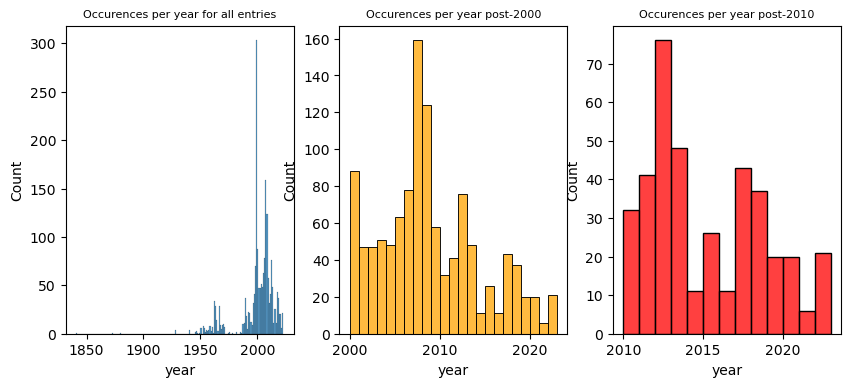

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes = axes.ravel()

sns.histplot(coff_dl_df, x="year", ax=axes[0], binwidth=1)
axes[0].set_title("Occurences per year for all entries", fontsize=8)

sns.histplot(coff_dl_df.loc[coff_dl_df["year"] >= 2000], x="year", ax=axes[1], binwidth=1, color="orange")
axes[1].set_title("Occurences per year post-2000", fontsize=8)

sns.histplot(coff_dl_df.loc[coff_dl_df["year"] >= 2010], x="year", ax=axes[2], binwidth=1, color="red")
axes[2].set_title("Occurences per year post-2010", fontsize=8)

plt.show()

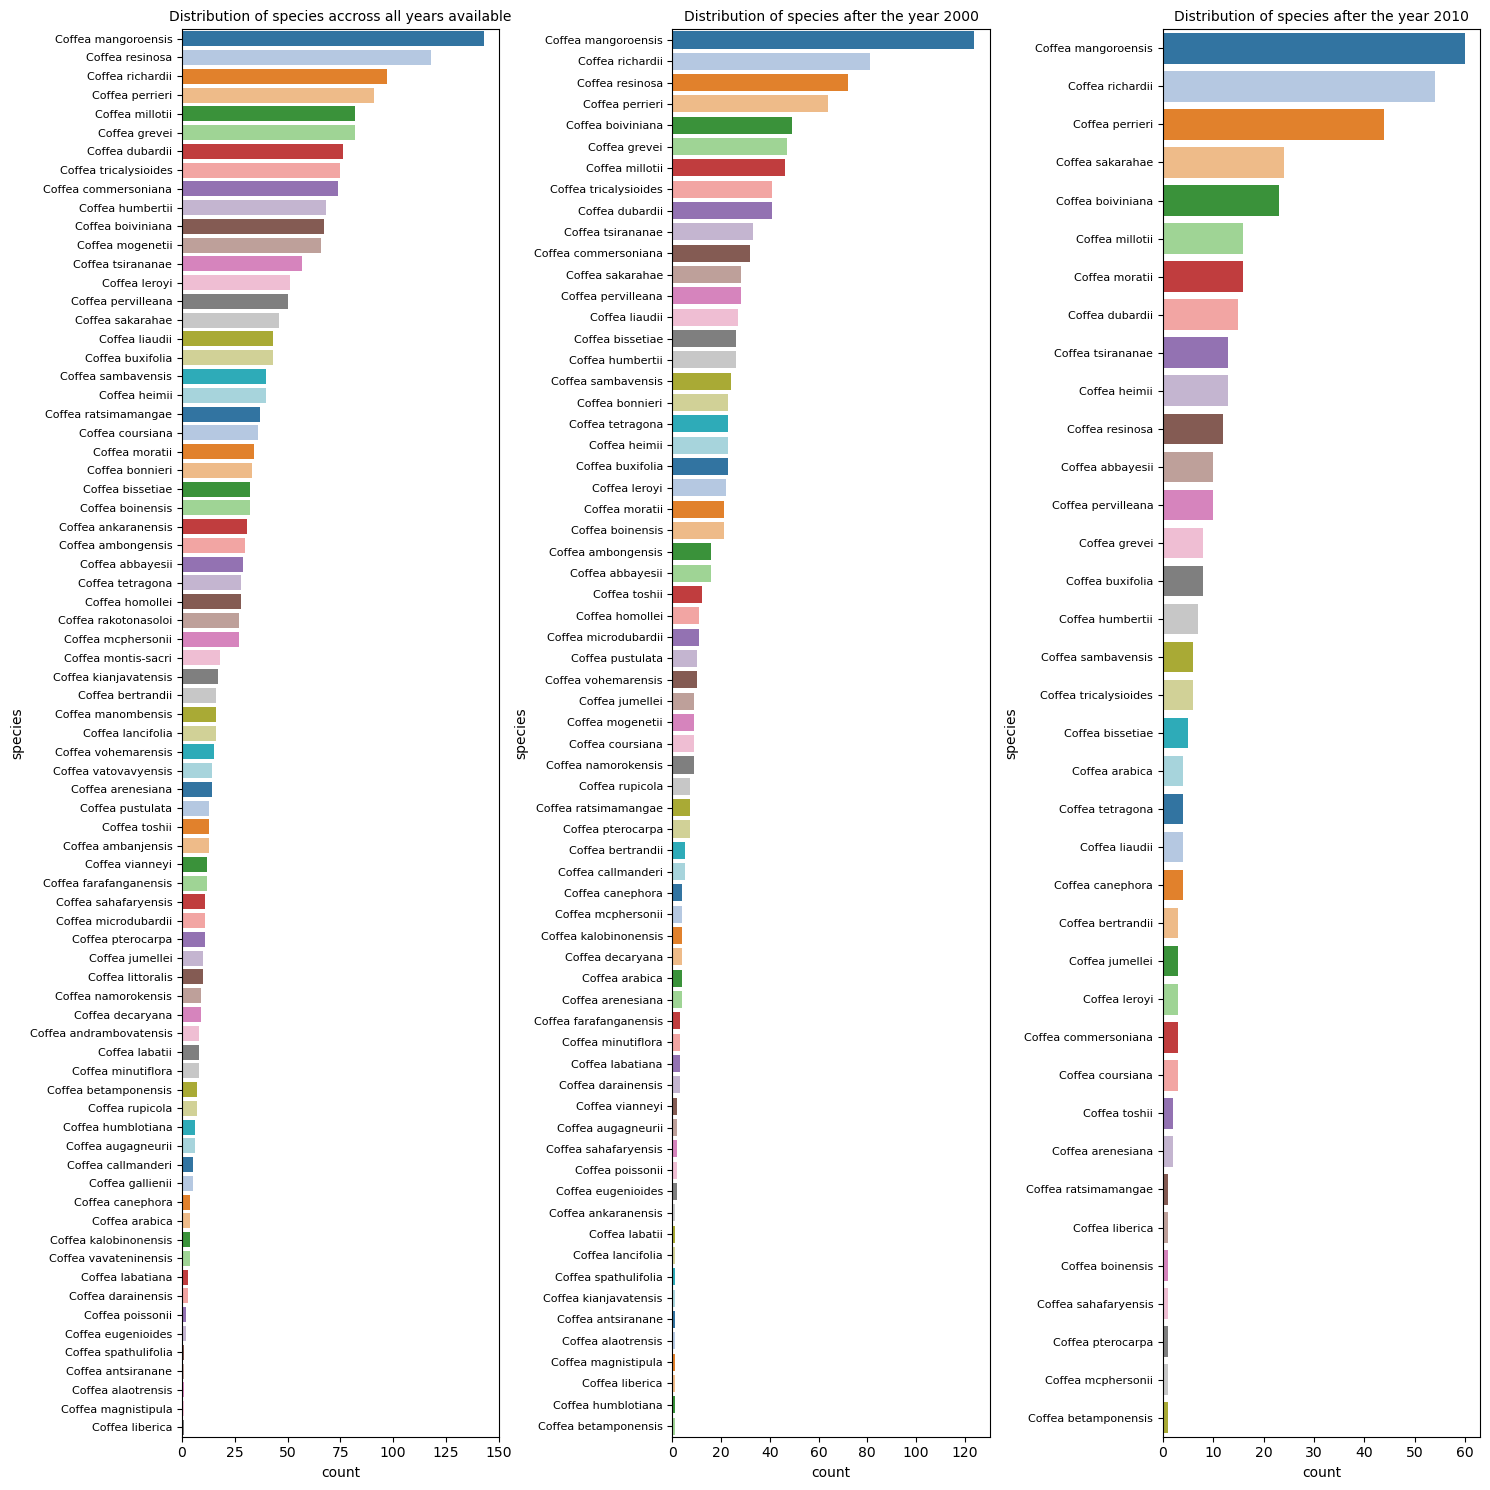

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
axes = axes.ravel()

temp_df = pd.DataFrame(coff_dl_df["species"].value_counts().reset_index().rename(columns={"species": "count", "index": "species"}))
sns.barplot(data=temp_df, y="species", x="count", ax=axes[0], palette="tab20")
axes[0].set_title("Distribution of species accross all years available", fontsize=10)
axes[0].tick_params(axis="y", labelsize=8)

temp_df = coff_dl_df.loc[coff_dl_df["year"] >= 2000]["species"].value_counts().reset_index().rename(columns={"species": "count", "index": "species"})
sns.barplot(data=temp_df, y="species", x="count", ax=axes[1], palette="tab20")
axes[1].set_title("Distribution of species after the year 2000", fontsize=10)
axes[1].tick_params(axis="y", labelsize=8)

temp_df = coff_dl_df.loc[coff_dl_df["year"] >= 2010]["species"].value_counts().reset_index().rename(columns={"species": "count", "index": "species"})
sns.barplot(data=temp_df, y="species", x="count", ax=axes[2], palette="tab20")
axes[2].set_title("Distribution of species after the year 2010", fontsize=10)
axes[2].tick_params(axis="y", labelsize=8)

fig.tight_layout()
plt.show()

In [46]:
print(f"Number of unique species found whole GBIF (no filter): {len(coff_dl_df['species'].unique())}")
print(f"Number of unique species after year 2000: {len(coff_dl_df.loc[coff_dl_df['year'] >= 2000]['species'].unique())}")
print(f"Number of unbique species after year 2010: {len(coff_dl_df.loc[coff_dl_df['year'] >= 2010]['species'].unique())}")


Number of unique species found whole GBIF (no filter): 75
Number of unique species after year 2000: 66
Number of unbique species after year 2010: 37


Keep >= 2000 for now because to have the most recent sampling yet have the most diverse set of occurences in terms of species

In [47]:
df_2000 = coff_dl_df.loc[coff_dl_df["year"] >= 2000]
df_2000.shape

(1155, 260)

In [50]:
print(f"There are {len(df_2000)} objects in post 2000 sampling")

There are 1155 objects in post 2000 sampling


### Tag with botanical series using several sources from the litterature

Davis and Rakotonasolo 2008 Baracoffea classif: https://academic.oup.com/botlinnean/article/158/3/355/2418549


#### From the cirad data on wild Madagascar coffea trees (R. Guyot) 

Some information on the initial classification of the botanical series which encapsulate some plant phenotypes:

    Charrier 1978 botanical series: https://horizon.documentation.ird.fr/exl-doc/pleins_textes/divers14-07/08149.pdf


In [51]:
# Load and drop blank rows
cirad_data_filename = "coff_madag_species_summary.xlsx"
cirad_df = pd.read_excel(data_dir / cirad_data_filename, decimal=",")
cirad_df = cirad_df.dropna(how="all").reset_index().drop(columns="index")

# Remove blank lines and strs
cirad_df["GBS sequence"] = cirad_df["GBS sequence"].str.rstrip()    #* \n still present after stripping

# Remove \n in Botanical series
cirad_df = cirad_df.replace(r"\n","", regex=True)

# Converting to proper NaN and reordering
cirad_df = cirad_df.replace({"-": np.nan, "NO POSITION": np.nan})
cirad_df = cirad_df.reindex(columns=["Species", "Species code", "Population code", "GBS sequence", "Botanical series", "Genome size (2C. pg)", "Latitude", "Longitude"])
# Remove NO from AND2 species
cirad_df["Longitude"] = cirad_df["Longitude"].str.replace("NO ", "")
cirad_df["Longitude"] = cirad_df["Longitude"].str.replace(",", ".")

# Removing outgroups and resetting index post cleaning
cirad_df = cirad_df.loc[cirad_df["Botanical series"] != "OUTGROUP"]
cirad_df = cirad_df.reset_index().drop(columns="index")

# Fix float types on continuous data
cirad_df["Genome size (2C. pg)"] = cirad_df["Genome size (2C. pg)"].astype(float)
cirad_df["Latitude"] = cirad_df["Latitude"].astype(float)
cirad_df["Longitude"] = cirad_df["Longitude"].astype(float)

# Drop unnecessary cols
cirad_df = cirad_df.drop(columns=["Population code", "Species code", "GBS sequence", "Genome size (2C. pg)", "Latitude", "Longitude"])

# Replace unknown botanical series with 'unknown'
cirad_df.loc[cirad_df["Botanical series"].isnull(), "Botanical series"] = "unknown"
cirad_df.columns = ["species", "botanicalSeries"]

# Consistent format accross species and botanical series from the GBIF nomenclature
cirad_df["species"] = cirad_df["species"].str.replace("_", ".")
cirad_df["species"] = cirad_df["species"].str.replace("C\.", "Coffea ", regex=True)
cirad_df["botanicalSeries"] = cirad_df["botanicalSeries"].str.strip()
cirad_df["species"] = cirad_df["species"].str.strip()


# Keep only a single species for each botanicalSeries
cirad_df = cirad_df.drop_duplicates(subset="species", keep="first")

In [52]:
cirad_df.head()

,species,botanicalSeries
0,Coffea abbayesii,Millotii
1,Coffea ambodirianenis,Millotii
2,Coffea ambongensis,Baracoffea
3,Coffea ankaranensis,Multiflorae
5,Coffea arenesiana,Multiflorae


In [53]:
print(f'There are {(cirad_df["botanicalSeries"] != "unknown").sum()} unique species with a known botanical series label in the cirad data')
print(f'There is {(cirad_df["botanicalSeries"] == "unknown").sum()} unique specie with an unknown botanical series label')

There are 45 unique species with a known botanical series label in the cirad data
There is 1 unique specie with an unknown botanical series label


#### Botanical series-species labels from the Razafinarivo paper in Tree Genetics& Genomes (2012)

https://link.springer.com/article/10.1007/s11295-012-0520-9/tables/1

    Letters indicate groups of populations that were not significantly different at p < 0.05 (HSD test)
    MAS Mascarocoffea, Mau Humblotianae/Mauritianae, Gar Garcinoides, Mil Millotii, Mul Multiflorae, Sub Subterminales, Ver Verae, NW northwest, NE northeast, S south, C center, E east, SE southeast, ETA east Tropical Africa, WTA west Tropical Africa, WCTA west/central Tropical Africa, MDG Madagascar, MAU Mauritius, COM/CO Comoros
    bHabitat information from Leroy 1972a, b; Charrier 1978; Davis et al. 2006 and F Rakotonasolo, Royal Botanical Gardens, Antananarivo, Madagascar, ‘ pers. comm.’).
    aMain region and country code as defined in Brummitt (2001)


Again, same nomenclature for species as GBIF + botanical series identical to Cirad data format (from Charrier 1978 + Davis and Rakotonasolo 2008 for Baracoffea)

In [54]:
url = "https://link.springer.com/article/10.1007/s11295-012-0520-9/tables/1"
try:
    r = requests.get(url=url)
    r.raise_for_status()
    print(f"{r.status_code=}")
except Exception as e:
    print(e)

r.status_code=200


In [55]:
razafinarivo_df = pd.read_html("https://link.springer.com/article/10.1007/s11295-012-0520-9/tables/1")[0]

In [56]:
razafinarivo_df.head()

,Main regiona/Botanical series,Species,Abbreviation used in figures,Population code,Country/ region,City-Locality of origin,Forest habitatb,Number of plants,Mean 2 C DNA ± SD (pg),CV
0,MAS/Mau,C. mauritiana Lam.,MAU,MAU,MAU,Plaine Champagne,humid,5,0.96 ± 0.04 a,4.85
1,MAS/Mau,C. humblotiana Baill.,HUMB,A230,COM-CO,"Mount Kartala, Grande Comore",humid,5,0.97 ± 0.05 ab,4.65
2,MAS/Mau,C. myrtifolia (A. Rich. ex DC.) J.-F.Leroy,MYR,MYR,MAU,Mount Brisé,humid,5,1.07 ± 0.03 efgh,3.25
3,MAS/Mau,C. macrocarpa A.Rich.,MAC,MAC,MAU,Le Pétrin,humid,7,1.17 ± 0.04 nopqrs,2.37
4,MAS/Mau,C. bernardiniana J.-F.Leroy,BER,BER,MAU,Montagne des Créoles,humid,6,1.23 ± 0.03 qrstu,2.59


Remove non Mascarocoffea (Madagascar) and retrieve botanical series abbrievation

In [57]:
# Filter for Mascarocoffea + keep only botanical series
razafinarivo_df = razafinarivo_df.loc[razafinarivo_df["Main regiona/Botanical series"].str.contains("MAS")].copy()

razafinarivo_df["Main regiona/Botanical series"] = razafinarivo_df["Main regiona/Botanical series"].apply(lambda x: x.split("/")[1])
razafinarivo_df = razafinarivo_df.iloc[:, 0:2]
razafinarivo_df.columns = ["botanicalSeries", "species"]
razafinarivo_df["botanicalSeries"] = razafinarivo_df["botanicalSeries"].str.strip()

# streamline species nomenclature + keep only a single rep per species
razafinarivo_df["species"] = razafinarivo_df["species"].str.extract("C. ([a-z\-]+)", expand=False).apply(lambda x: "Coffea " + x)
razafinarivo_df["species"] = razafinarivo_df["species"].str.strip()
razafinarivo_df = razafinarivo_df.drop_duplicates(subset="species", keep="first")


In [58]:
# Create a hashmap of abbreviations from the cirad data to streamline both dfs
abbrev_botseries = {}
for abbrev in razafinarivo_df["botanicalSeries"].unique():
    for botseries in cirad_df["botanicalSeries"].unique():
        if botseries.startswith(abbrev):
            abbrev_botseries[abbrev] = botseries

assert len(abbrev_botseries) == len(razafinarivo_df["botanicalSeries"].unique()), "length of abbreviations dict does not match"

razafinarivo_df["botanicalSeries"] = razafinarivo_df["botanicalSeries"].apply(lambda x: abbrev_botseries[x] if x in abbrev_botseries else x)


In [59]:
# Check common/diffs with Cirad datasets
# pd.merge(cirad_df, razafinarivo_df, how="outer", on="species")

#### Get botanical series from Rimlinger_AnnBot (2020)
    Rimlinger A, Raharimalala N, Letort V, Rakotomalala JJ, Crouzillat D, Guyot R, Hamon P, Sabatier S. Phenotypic diversity assessment within a major ex situ collection of wild endemic coffees in Madagascar. Ann Bot. 2020 Oct 6;126(5):849-863. doi: 10.1093/aob/mcaa073. PMID: 32303759; PMCID: PMC7539352.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7539352/table/T1/

In [60]:
try:
    r = requests.get(url="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7539352/table/T1/")
    r.raise_for_status()
    print(f"{r.status_code=}")
except Exception as e:
    print(e)

403 Client Error: Forbidden for url: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7539352/table/T1/


We will need to use a User-Agent header to a response with status code == 200

In [61]:
url = "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7539352/table/T1/"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36"}
try:
    r = requests.get(url=url, headers=headers)
    r.raise_for_status()
    print(f"{r.status_code=}")
except Exception as e:
    print(e)

r.status_code=200


In [62]:
rimlinger_df = pd.read_html(r.text)[0]
rimlinger_df.head()

,Population code,Species,Botanical series,Origin/locality,Province,Latitude,Longitude,Habitat class
0,A964,C. dubardii Jum.,Garcinioides,Anivorano Nord,Antsiranana (North),12°44′ S,49°09′ E,3.0
1,A969,C. dubardii Jum.,Garcinioides,North of Vohemar (Diégo-Suarez),Antsiranana (North),13°20′ S,49°57′ E,3.0
2,A516,C. heimii J.-F.Leroy,Garcinioides,Diégo-Suarez (Sahafary),Antsiranana (North),12°35′ S,49°26′30″ E,3.0
3,A40,C. mogenetii Dubard,Garcinioides,Montagne d’Ambre,Antsiranana (North),49°12′ S,12°26′ E,3.0
4,A252,C. tetragona Jum. & H.Perrier,Garcinioides,Behangony (Est de Maromandia),Mahajanga (Northwest),14°13′30″ S,48°09′ E,3.0


Format species and botanical series as GBIF/Cirad to streamline all sets

In [63]:
# Format species and keep relevant cols
rimlinger_df["Species"] = rimlinger_df["Species"].str.extract("C. ([a-z\-]+)", expand=False).apply(lambda x: "Coffea " + x)
rimlinger_df = rimlinger_df.iloc[:, 1:3]

rimlinger_df.columns = ["species", "botanicalSeries"]
rimlinger_df["species"] = rimlinger_df["species"].str.strip()
rimlinger_df["botanicalSeries"] = rimlinger_df["botanicalSeries"].str.strip()

# Keep only 1 record per specie
rimlinger_df = rimlinger_df.drop_duplicates(subset="species", keep="first")


In [64]:
# Check common/diffs with Cirad datasets
# pd.merge(cirad_df, razafinarivo_df, how="outer", on="species")

#### Baracoffea new taxonomic botanical_series

Extract all species name identified to the new Barracoffea taxonimic assignement from this paper:

    AARON P. DAVIS , FRANCK RAKOTONASOLO, A taxonomic revision of the baracoffea alliance: nine remarkable Coffea species from western Madagascar, Botanical Journal of the Linnean Society, Volume 158, Issue 3, November 2008, Pages 355–390, https://doi.org/10.1111/j.1095-8339.2008.00936.x



We will use BeautifulSoup4 to extract the names of the species from the paper's

In [65]:
url = "https://academic.oup.com/botlinnean/article/158/3/355/2418549#84218288"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36"}
try:
    r = requests.get(url=url, headers=headers)
    r.raise_for_status()
    print(f"{r.status_code=}")
    html_doc = r.text
except Exception as e:
    print(e)

r.status_code=200


In [66]:
def extract_barracoffea_species():
    barracoffea_davis = []
    soup = BeautifulSoup(html_doc, "html.parser")
    h3_tags = soup.find_all("h3")
    for h3 in h3_tags:
        for tag in h3.find_all(["em", "span"]): 
            tag.replace_with(tag.text)  # replace each tag with its text content
        h3_contents = h3.text  # get the text contents of the h3 tag
        pattern = r"^\d\. (Coffea ?\w+)"
        match = re.search(pattern=pattern, string=h3_contents)
        if match:
            if match.group(1) == "Coffeagrevei":
                barracoffea_davis.append("Coffea grevei")
            else:
                barracoffea_davis.append(match.group(1))
    return barracoffea_davis

In [67]:
extract_barracoffea_species()

['Coffea ambongensis',
 'Coffea boinensis',
 'Coffea humbertii',
 'Coffea grevei',
 'Coffea bissetiae',
 'Coffea decaryana',
 'Coffea namorokensis',
 'Coffea labatii',
 'Coffea pterocarpa']

#### Validate species name according to GBIF nomenclature

In [68]:
#TODO ADD TO GBIF_API MODULE
def check_species_name_gbif(species_name: list):
    if not isinstance(species_name, str):
        raise TypeError(f"{species_name} must be of type list.")
    
    url = "http://api.gbif.org/v1/species/match"
    params = {"name": species_name}
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
    else:
        data = f"request failed: status-code = {response.status_code}"
    return data
        

In [69]:
check_species_name_gbif("Coffea daphnoides")

{'usageKey': 2895315,
 'scientificName': 'Coffea L.',
 'canonicalName': 'Coffea',
 'rank': 'GENUS',
 'status': 'ACCEPTED',
 'confidence': 94,
 'matchType': 'HIGHERRANK',
 'kingdom': 'Plantae',
 'phylum': 'Tracheophyta',
 'order': 'Gentianales',
 'family': 'Rubiaceae',
 'genus': 'Coffea',
 'kingdomKey': 6,
 'phylumKey': 7707728,
 'classKey': 220,
 'orderKey': 412,
 'familyKey': 8798,
 'genusKey': 2895315,
 'synonym': False,
 'class': 'Magnoliopsida'}

In [70]:
for specie in cirad_df["species"]:
    data = check_species_name_gbif(specie)
    if "status" not in data:
        print(f"{specie} cannot be found in GBIF dataset")
    elif "species" not in data:
        print(f"{specie} does not have a specie taxon rank in GBIF")
    elif data["matchType"] == "FUZZY":
        print(f"{specie} is mispelled. Correct spelling is {data['species']}")
    else:
        print(f"{specie} found in GBIF!")

Coffea abbayesii found in GBIF!
Coffea ambodirianenis is mispelled. Correct spelling is Coffea millotii
Coffea ambongensis found in GBIF!
Coffea ankaranensis found in GBIF!
Coffea arenesiana found in GBIF!
Coffea augagneuri is mispelled. Correct spelling is Coffea augagneurii
Coffea bertrandii found in GBIF!
Coffea betamponensis found in GBIF!
Coffea bissetiae found in GBIF!
Coffea boinensis found in GBIF!
Coffea boiviniana found in GBIF!
Coffea bonnieri found in GBIF!
Coffea costei found in GBIF!
Coffea coursiana found in GBIF!
Coffea daphnoides does not have a specie taxon rank in GBIF
Coffea dolichophylla found in GBIF!
Coffea dubardii found in GBIF!
Coffea farafanganensis found in GBIF!
Coffea heimii found in GBIF!
Coffea homollei found in GBIF!
Coffea humblotiana found in GBIF!
Coffea jumellei found in GBIF!
Coffea kianjavatensis found in GBIF!
Coffea lancifolia found in GBIF!
Coffea leroyi found in GBIF!
Coffea macrocarpa found in GBIF!
Coffea mangoroensis found in GBIF!
Coffea m

**We need to format all the data sources to match the species naming convention of the GBIF**

In [72]:
#TODO FORMAT CIRAD DATA

#! FIND OTHER SOURCES OF BOTANICAL SERIES LABELS BEFORE MERGE

In [71]:
# pd.merge(df_2000, cirad_df, how="outer", on="species").loc[pd.merge(df_2000, cirad_df, how="outer", on="species")["botanicalSeries"] == "unknown"]